**Exploratory Data Analysis (EDA):** This section contains data visualizations that help to explain the data. They are particularly focused on beginning to identify features that might explain the target variable (price).


In [6]:
#Import packages
import matplotlib.pyplot as plt
from math import exp
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

In [7]:
#Read in data
df = pd.read_csv('kc_house_data_train.csv')

Exploratory Data Analysis:

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   price          17290 non-null  float64
 4   bedrooms       17290 non-null  int64  
 5   bathrooms      17290 non-null  float64
 6   sqft_living    17290 non-null  int64  
 7   sqft_lot       17290 non-null  int64  
 8   floors         17290 non-null  float64
 9   waterfront     17290 non-null  int64  
 10  view           17290 non-null  int64  
 11  condition      17290 non-null  int64  
 12  grade          17290 non-null  int64  
 13  sqft_above     17290 non-null  int64  
 14  sqft_basement  17290 non-null  int64  
 15  yr_built       17290 non-null  int64  
 16  yr_renovated   17290 non-null  int64  
 17  zipcode        17290 non-null  int64  
 18  lat   

In [14]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

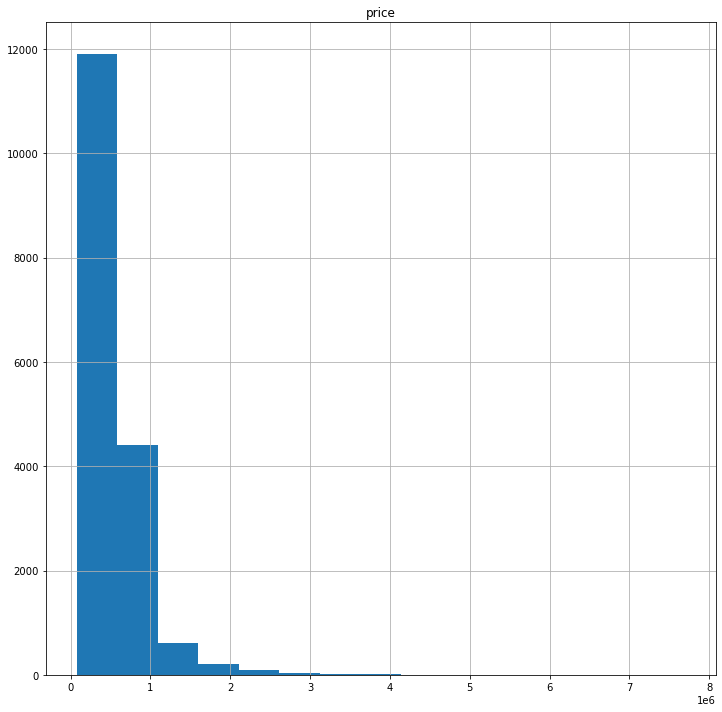

In [21]:
#Creating graphs for price (dependent variable of model)
df.hist('price', bins = 15, figsize=(12,12))

<AxesSubplot:>

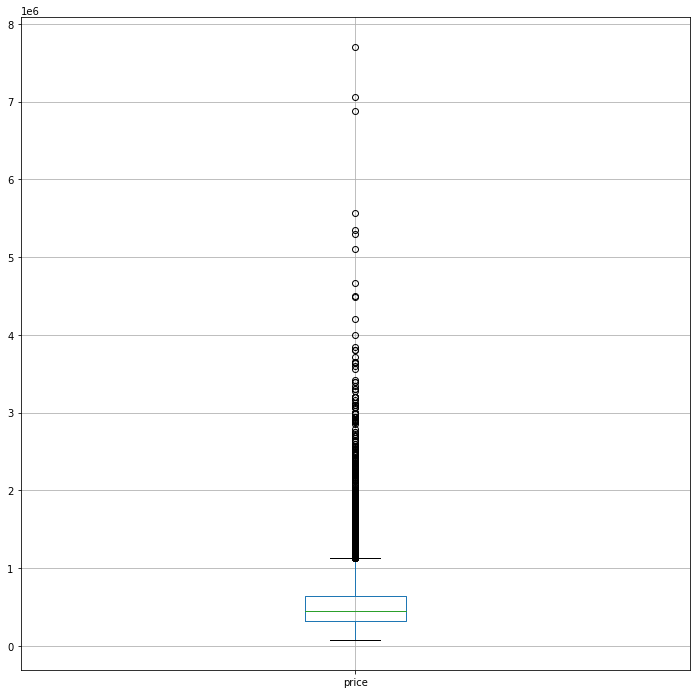

In [18]:
df.boxplot('price', figsize=(12,12))

<AxesSubplot:>

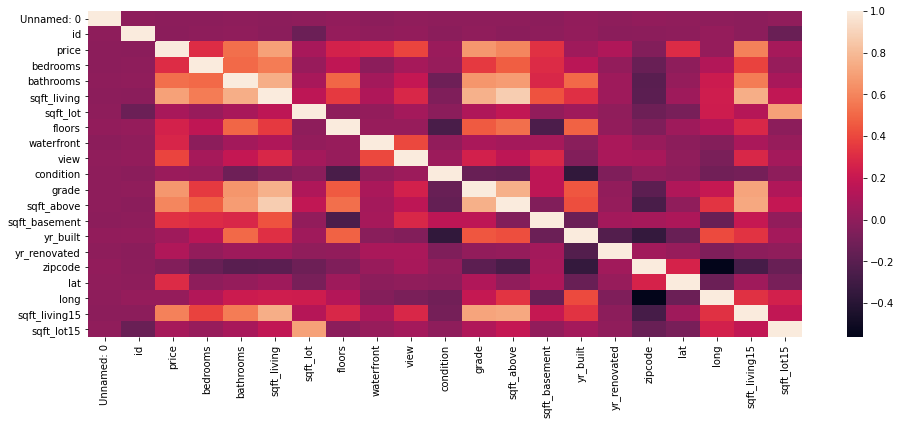

In [5]:
#Checking heatmap to see if there is any correlation between variables and price (Visualization #1)
corr=df.corr()
plt.figure(figsize=(16,6))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [6]:
#Lighter colored boxes indicate stronger correlation - focus on price column

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

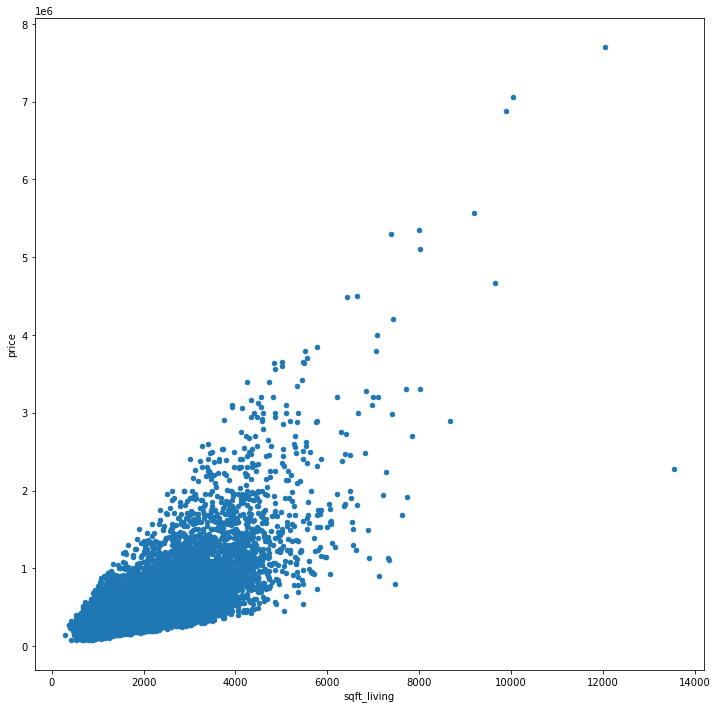

In [11]:
#Looking at scatter plot because sqft_living has strong corr with price
df.plot.scatter('sqft_living', 'price', figsize=(12,12))

<AxesSubplot:xlabel='grade'>

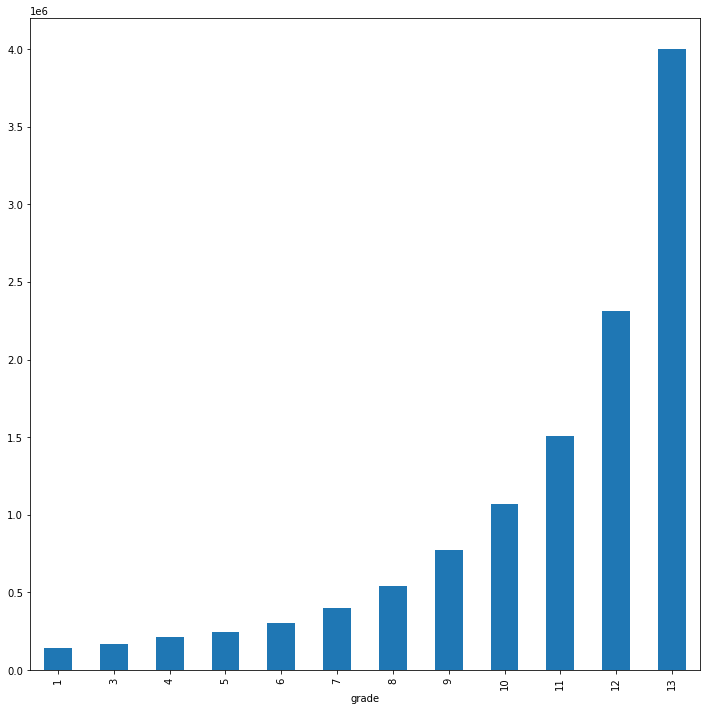

In [13]:
#Looking at average price by grade as that also showed a strong corr
df.groupby('grade').mean()['price'].plot.bar(figsize=(12,12))

Engineered several new features that I thought would relate to the price of the house.

In [23]:
#Engineering feature for year sold
years = []
for date in df['date']:
    years.append(date[0:4])
df['year_sold']=years

In [29]:
df['year_sold'] = pd.to_numeric(df['year_sold'])

In [26]:
df['age'] = df['year_sold']-df['yr_built']

In [27]:
#Engineering a new feature for whether or not the house was renovated
df['renovated'] = np.where(df['yr_renovated']==0,0,1)

In [28]:
#Engineering a new feature for whether or not the house is north or east of the Space Needle
space_lat = 47.6
space_long = -122.3
df['n']=np.where(df['lat']>space_lat, 1, 0)
df['e']=np.where(df['long']>space_long, 1, 0)

Conducted some statistical tests as part of EDA.

In [30]:
from statsmodels.formula.api import ols

In [32]:
#Linear model to begin to see if there are relationships between price and any of the variables
lr_model = ols(formula='price~bedrooms+bathrooms+sqft_living+sqft_lot+floors\
               +waterfront+view+condition+grade+sqft_above+sqft_basement+sqft_living15+\
               sqft_lot15+age+sqft_lot15+renovated+n+e', data=df).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     2374.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        05:11:20   Log-Likelihood:            -2.3631e+05
No. Observations:               17290   AIC:                         4.727e+05
Df Residuals:                   17273   BIC:                         4.728e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.272e+05   1.91e+04    -48.524      0.000   -9.65e+05    -8.9e+05
bedrooms      -3.648e+04   2153.356    -16.939      0.000   -4.07e+04   -3.23e+04
bathrooms      4.152e+04   3766.002     11.025      0.000    3.41e+04    4.89e+04
sqft_living     115.1702      2.618     43.995      0.000     110.039     120.301
sqft_lot          0.0338      0.053      0.638      0.523      -0.070       0.138
floors         9061.1484   4171.211      2.172      0.030     885.152    1.72e+04
waterfront     6.037e+05   1.96e+04     30.728      0.000    5.65e+05    6.42e+05
view           5.289e+04   2451.498     21.575      0.000    4.81e+04    5.77e+04
condition      2.607e+04   2700.948      9.654      0.000    2.08e+04    3.14e+04
grade          1.013e+05   2491.703     40.662      0.000    9.64e+04    1.06e+05
sqft_above       64.6937      2.594     24.944      0.000      59.610      69.777
sqft_basement    50.4765      3.027     16.675      0.000      44.543      56.410
sqft_living15    24.2635      3.997      6.071      0.000      16.430      32.097
sqft_lot15       -0.5086      0.083     -6.127      0.000      -0.671      -0.346
age            2905.1598     81.682     35.567      0.000    2745.056    3065.264
renovated      2.808e+04   8471.609      3.314      0.001    1.15e+04    4.47e+04
n              1.448e+05   3363.533     43.056      0.000    1.38e+05    1.51e+05
e              6907.2765   3872.412      1.784      0.074    -683.043    1.45e+04
==============================================================================
Omnibus:                    14665.634   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1461185.563
Skew:                           3.553   Prob(JB):                         0.00
Kurtosis:                      47.472   Cond. No.                     1.69e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.58e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
#Removed sqft_lot as p-value was high
lr_model = ols(formula='price~bedrooms+bathrooms+sqft_living+floors\
               +waterfront+view+condition+grade+sqft_above+sqft_basement+sqft_living15+\
               sqft_lot15+age+sqft_lot15+renovated+n+e', data=df).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     2532.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        05:12:29   Log-Likelihood:            -2.3631e+05
No. Observations:               17290   AIC:                         4.727e+05
Df Residuals:                   17274   BIC:                         4.728e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.272e+05   1.91e+04    -48.523      0.000   -9.65e+05    -8.9e+05
bedrooms      -3.651e+04   2152.658    -16.961      0.000   -4.07e+04   -3.23e+04
bathrooms      4.154e+04   3765.813     11.031      0.000    3.42e+04    4.89e+04
sqft_living     115.2428      2.615     44.065      0.000     110.117     120.369
floors         8986.0347   4169.480      2.155      0.031     813.432    1.72e+04
waterfront     6.034e+05   1.96e+04     30.722      0.000    5.65e+05    6.42e+05
view           5.294e+04   2450.221     21.607      0.000    4.81e+04    5.77e+04
condition      2.604e+04   2700.374      9.643      0.000    2.07e+04    3.13e+04
grade          1.013e+05   2491.420     40.675      0.000    9.65e+04    1.06e+05
sqft_above       64.8051      2.588     25.044      0.000      59.733      69.877
sqft_basement    50.4377      3.026     16.666      0.000      44.506      56.370
sqft_living15    24.1093      3.989      6.044      0.000      16.290      31.929
sqft_lot15       -0.4724      0.061     -7.791      0.000      -0.591      -0.354
age            2906.7140     81.644     35.602      0.000    2746.684    3066.744
renovated      2.801e+04   8470.813      3.307      0.001    1.14e+04    4.46e+04
n              1.448e+05   3362.813     43.052      0.000    1.38e+05    1.51e+05
e              6987.5634   3870.302      1.805      0.071    -598.621    1.46e+04
==============================================================================
Omnibus:                    14660.711   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1458761.895
Skew:                           3.551   Prob(JB):                         0.00
Kurtosis:                      47.435   Cond. No.                     9.83e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Based on the t values, waterfront, age, grade, and whether it was north of the space needle had a significant impact on price.

In [35]:
import scipy
from scipy.stats import ttest_ind

In [37]:
#Conducting t-test to see if there is a stat. sig. difference in price when a house is renovated
orig = df[df['renovated']==0]
reno = df[df['renovated']==1]

Null hypthesis: Average price will be same for both groups

Alternative: Average price will be different

In [38]:
ttest_ind(orig.price, reno.price)

Ttest_indResult(statistic=-15.544856792041145, pvalue=4.007705820364685e-54)

Therefore, we reject the null hypthesis given p-value <<< alpha of 0.05.

In [8]:
#ANOVA to test if there is a stat. sig. difference in price based on condition
cond1 = df[df['condition']==1]['price']
cond2 = df[df['condition']==2]['price']
cond3 = df[df['condition']==3]['price']
cond4 = df[df['condition']==4]['price']
cond5 = df[df['condition']==5]['price']

In [9]:
import scipy.stats as st

Null: There is no difference in price among the conditions.
Alternative: There is a difference

In [10]:
st.f_oneway(cond1, cond2, cond3, cond4, cond5)

F_onewayResult(statistic=28.799197350706148, pvalue=6.813536869427384e-24)

p-value << 0.05, therefore there is a difference in price among the condition groups.